In [ ]:
import pandas as pd
import numpy as np
import re
import tweepy
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime
plt.style.use('fivethirtyeight')

In [ ]:
consumerKey= '******************************'
consumerSecret= '*****************************************'
accessToken= '*****************************************'
accesTokenSecret= '******************************************'

In [ ]:
#Creat the authentication Object
authenticate=tweepy.OAuthHandler(consumerKey, consumerSecret)
#Set the access token and access token secret
authenticate.set_access_token(accessToken, accesTokenSecret)
api=tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
#Gather 3000 tweets about e-learning
#Create a search term
search_term='HP laptop'
#Creat the cursor object

tweets=tweepy.Cursor(api.search,
                     q=search_term,
                     lang='en',
                     since='2021-10-28',
                     tweet_mode='extended'). items(3000)
all_tweets=[tweet.full_text for tweet in tweets]
all_tweets

['3M Privacy Filter for HP EliteBook 840 G1 / G2 Laptop (PFNHP001) UHMM6QN\n\nhttps://t.co/wiJ29IldSR https://t.co/zEwgwAbvQt',
 "HP 2022 Newest 17z Laptop, 17 3'' HD+ Touchscreen, AMD Ryzen 5 5500U Processor, Bluetooth, Wi-Fi 6, Webcam, HDMI, Windows 11 8LEAGHN\n\nhttps://t.co/hchhqTgtJ3 https://t.co/ThyrovEAut",
 'RT @vimalkumar_ice: After send time service laptop is working as like earlier such a fentastic work again hanging happened with in two hour…',
 'HP Chromebook x360 Intel Celeron N4120 14 inch(35.6 cm) Micro-Edge, Touchscreen, 2-in-1 Laptop (4GB RAM/64GB eMMC/Chrome 64/UHD Graphics,1.49kg), 14a-ca0504TU https://t.co/vrBMY0b0x4',
 'Dc Power Adapter Converter 5.5*2.5mm Female to USB Type C Jack Converter for Macbook Lenovo Dell Hp Asus Laptop Charger $3.92\nclick&gt;&gt;https://t.co/GtpSHoDR6Y\n#amazon #aliexpress #rt https://t.co/68vc4DUIWq',
 '2022 HP Pavilion Laptop, 14-inch HD Touchscreen, AMD 3000 Series Processor, 16GB RAM, 576GB Storage, Long Battery Life, Webca EA9THKA

In [ ]:
#Creating a dataframe to Store tweets
df= pd.DataFrame(all_tweets, columns=['Tweets'])
#Show tweets
df.head(20)

,Tweets
0,3M Privacy Filter for HP EliteBook 840 G1 / G2...
1,"HP 2022 Newest 17z Laptop, 17 3'' HD+ Touchscr..."
2,RT @vimalkumar_ice: After send time service la...
3,HP Chromebook x360 Intel Celeron N4120 14 inch...
4,Dc Power Adapter Converter 5.5*2.5mm Female to...
5,"2022 HP Pavilion Laptop, 14-inch HD Touchscree..."
6,RT @IntelIndia: Get ready to meet a laptop tha...
7,"Choose HP Wireless Keyboard and Mouse CS10, fo..."
8,RT @world94321: Open Box(Just Like New) OMEN X...
9,"300pcs M2,M2.5,M3 Laptop Notebook Computer Scr..."


In [ ]:
def cleanTwt(twt):
	twt=re.sub('RT','',twt) #Remove 'RT' from the tweets
	twt=re.sub('#[A-Za-z0-9]+','',twt) #Remove '#' from the tweets
	twt=re.sub('\\n','',twt) #Remove '\n' from the tweets
	twt=re.sub('https?:\/\/\S+','',twt) #Remove 'hyperlinks' from the tweets
	twt=re.sub('@[\S]*','',twt) #Remove '@mentions' from the tweets
	twt=re.sub('^[\s]+|[\s]+$','',twt) #Remove leading and trailing whitespaces
	return twt

In [ ]:
def cleanTwt(twt):
	twt=re.sub('â€™','',twt)
	twt=re.sub('â€“','',twt)
	twt=re.sub('*','',twt)
	twt=re.sub('âœ¡','',twt)
	twt=re.sub('â€','',twt)
	twt=re.sub('âœ©','',twt)
	return twt

In [ ]:
#Data Cleaning
# Create a function to clean the tweets by replacing certain characters with blank space
def cleanTwt(twt):
	twt=re.sub('ðŸ‡ºðŸ‡','',twt)
	twt=re.sub(' ðŸ’»ðŸ','',twt)
	twt=re.sub('â†“ â€¦','',twt)
	twt=re.sub('Â£199.99 &gt;&gt;&gt','',twt)
	twt=re.sub('âœ”ï','',twt)
	twt=re.sub('ðŸ”¥ðŸ’¥','',twt)
	return twt

In [ ]:
#Create a new column called 'Cleaned_Tweets'
df['Cleaned_Tweets']=df['Tweets']. apply(cleanTwt)
#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,3M Privacy Filter for HP EliteBook 840 G1 / G2...,3M Privacy Filter for HP EliteBook 840 G1 / G2...,0.000000,0.0,Neutral
1,"HP 2022 Newest 17z Laptop, 17 3'' HD+ Touchscr...","HP 2022 Newest 17z Laptop, 17 3'' HD+ Touchscr...",0.000000,0.0,Neutral
2,RT @vimalkumar_ice: After send time service la...,RT @vimalkumar_ice: After send time service la...,0.500000,0.0,Neutral
3,HP Chromebook x360 Intel Celeron N4120 14 inch...,HP Chromebook x360 Intel Celeron N4120 14 inch...,0.000000,0.0,Neutral
4,Dc Power Adapter Converter 5.5*2.5mm Female to...,Dc Power Adapter Converter 5.5*2.5mm Female to...,0.166667,0.0,Neutral


In [ ]:
#Remove any duplicate rows
df.drop_duplicates(inplace=True)
idx=list(range(0, len(df)))
df=df.set_index(pd.Index(idx))
#Show tweets
df

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,3M Privacy Filter for HP EliteBook 840 G1 / G2...,3M Privacy Filter for HP EliteBook 840 G1 / G2...,0.000000,0.000000,Neutral
1,"HP 2022 Newest 17z Laptop, 17 3'' HD+ Touchscr...","HP 2022 Newest 17z Laptop, 17 3'' HD+ Touchscr...",0.000000,0.000000,Neutral
2,RT @vimalkumar_ice: After send time service la...,RT @vimalkumar_ice: After send time service la...,0.500000,0.000000,Neutral
3,HP Chromebook x360 Intel Celeron N4120 14 inch...,HP Chromebook x360 Intel Celeron N4120 14 inch...,0.000000,0.000000,Neutral
4,Dc Power Adapter Converter 5.5*2.5mm Female to...,Dc Power Adapter Converter 5.5*2.5mm Female to...,0.166667,0.000000,Neutral
...,...,...,...,...,...
2221,Second hand Laptop near me online android app....,Second hand Laptop near me online android app....,0.426190,0.332778,Positive
2222,RT @kype_computers: HP Pavilion Gaming Laptop ...,RT @kype_computers: HP Pavilion Gaming Laptop ...,0.000000,0.000000,Neutral
2223,"LSS Laptop 17-17 3"" Skin with Colorful Daisy F...","LSS Laptop 17-17 3"" Skin with Colorful Daisy F...",0.400000,0.300000,Positive
2224,HP Pavilion 13 Laptop (Core i5 10th Gen/8 GB/2...,HP Pavilion 13 Laptop (Core i5 10th Gen/8 GB/2...,0.000000,0.000000,Neutral


In [ ]:
df.to_csv('df.csv', index= False)

In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
	return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity

def getPolarity(twt):
	return TextBlob(twt).sentiment.polarity

In [ ]:
#Create two new column for our dataset and it will hold the subjectivity and polarity
df['Subjectivity']=df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity']=df['Cleaned_Tweets'].apply(getPolarity)
#Show the data
df.head(10)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,3M Privacy Filter for HP EliteBook 840 G1 / G2...,3M Privacy Filter for HP EliteBook 840 G1 / G2...,0.000000,0.000000,Neutral
1,"HP 2022 Newest 17z Laptop, 17 3'' HD+ Touchscr...","HP 2022 Newest 17z Laptop, 17 3'' HD+ Touchscr...",0.000000,0.000000,Neutral
2,RT @vimalkumar_ice: After send time service la...,RT @vimalkumar_ice: After send time service la...,0.500000,0.000000,Neutral
3,HP Chromebook x360 Intel Celeron N4120 14 inch...,HP Chromebook x360 Intel Celeron N4120 14 inch...,0.000000,0.000000,Neutral
4,Dc Power Adapter Converter 5.5*2.5mm Female to...,Dc Power Adapter Converter 5.5*2.5mm Female to...,0.166667,0.000000,Neutral
5,"2022 HP Pavilion Laptop, 14-inch HD Touchscree...","2022 HP Pavilion Laptop, 14-inch HD Touchscree...",0.400000,-0.050000,Negative
6,RT @IntelIndia: Get ready to meet a laptop tha...,RT @IntelIndia: Get ready to meet a laptop tha...,0.700000,0.450000,Positive
7,"Choose HP Wireless Keyboard and Mouse CS10, fo...","Choose HP Wireless Keyboard and Mouse CS10, fo...",0.500000,0.400000,Positive
8,RT @world94321: Open Box(Just Like New) OMEN X...,RT @world94321: Open Box(Just Like New) OMEN X...,0.477273,0.068182,Positive
9,"300pcs M2,M2.5,M3 Laptop Notebook Computer Scr...","300pcs M2,M2.5,M3 Laptop Notebook Computer Scr...",0.000000,0.000000,Neutral


# New Section

In [ ]:
df.to_csv('df.csv', index= False)

In [ ]:
#Create a function to classify or label the sentiment as Negative(polarity <0),Positive(polarity>0) Neutral(polarity=0)
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
      return 'Positive'
  else:
      return 'Neutral'

In [ ]:
#Create a column called 'Sentiment'
df['Sentiment']=df['Polarity'].apply(getSentiment)
#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,3M Privacy Filter for HP EliteBook 840 G1 / G2...,3M Privacy Filter for HP EliteBook 840 G1 / G2...,0.000000,0.0,Neutral
1,"HP 2022 Newest 17z Laptop, 17 3'' HD+ Touchscr...","HP 2022 Newest 17z Laptop, 17 3'' HD+ Touchscr...",0.000000,0.0,Neutral
2,RT @vimalkumar_ice: After send time service la...,After send time service laptop is working as l...,0.500000,0.0,Neutral
3,HP Chromebook x360 Intel Celeron N4120 14 inch...,HP Chromebook x360 Intel Celeron N4120 14 inch...,0.000000,0.0,Neutral
4,Dc Power Adapter Converter 5.5*2.5mm Female to...,Dc Power Adapter Converter 5.5*2.5mm Female to...,0.166667,0.0,Neutral


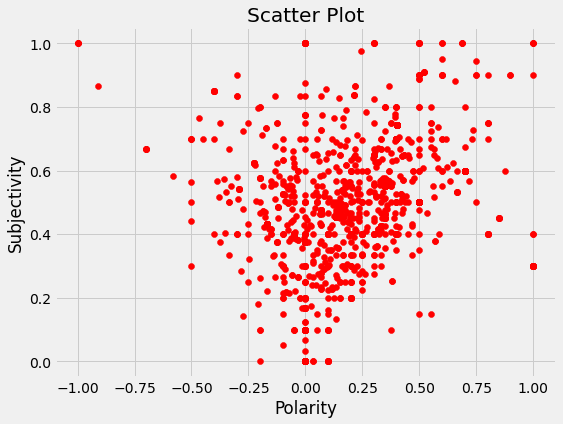

In [ ]:
#Create a scatter plot of the subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0, len(df)):
 plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='red')
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()